First import required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import digamma 
from scipy.linalg import sqrtm
import seaborn as sns

# Regression Spline
Assume that the range of x is $[a,b]$. Let the point
$$ a < \xi_1 < \dots < \xi_K < b$$
be a partion of the interval $[a,b]$  
$\left\{ \xi_1 , \dots , \xi_K \right\}$ are called knots.

Then make the function which return the knot points

In [2]:
def defineKnot(X,K=30):
    upper = max(X)
    lower = min(X)
    out = np.linspace(start=lower,stop=upper,num=K+2)[1:K+1]
    return(out)

# Radial Basis Function
A RBF $\varphi$ is a real valued function whose value depends only on the distance from origin.
A real function $\varphi : [0,\infty) \rightarrow {\rm I\!R}$ with a metric on space $\| \cdot \| : V \rightarrow [0,\infty)$ a function $\varphi_c = \varphi(\|\mathbf{x} - \mathbf{c}\|)$ is said to be a radial kernel centered at c. A radial function and the associated radial kernels are said to be radial basis function

we use radial basis functions defined by
$$
\mathbf{b}(u) = \left\{  u, \left| \frac{u-\tau_1}{c} \right|^3 , \cdots , \left| \frac{u-\tau_K}{c} \right|^3 \right\}
$$
where $c$ is sample standard deviation 

Then we can make the function which retrun the basis

In [3]:
def b(u,tau,sd):
    lst = []
    #lst.append(np.ones(len(u)))
    #lst.append(u)
    for i in tau:
        lst.append(abs((u-i)/sd)**3)
    out = np.array(lst)
    return(out)

Nonparametric linear model can be represented as
$$ Y = \mathbf{b}(X) \boldsymbol{\beta} + \varepsilon$$
where $Y \in  {\rm I\!R}^{n\times1}, X \in  {\rm I\!R}^{n\times1}$ and $\varepsilon \sim N(0,\tau^{-1})$

# Make toy data

Let
$$y = \sum_{l=1}^{4} f_l(X_l) + \sum_{k=1}^{4} Z_k \theta_k + e $$

$$
\begin{align*}
f_1(x) &= 3exp(-30(x-0.3)^2)+exp(-50(x-0.7)^2)\\
f_2(x) &= sin(2\pi x)\\
f_3(x) &= x\\
f_4(x) &= 0
\theta_1 &= 0.6\\
\theta_2 &= -1\\
\theta_3 &= 0\\
\theta_4 &= 0
\end{align*}
$$

Plotting true distribution of $Y$ is

In [4]:
def f(x):
    #out = np.sin(2*np.pi*x)
    out = 3*np.exp(-30*(x-0.2)**2) + np.exp(-50*(x-0.7)**2)
    return(out)

In [5]:
def f1(x):
    #out = np.sin(2*np.pi*x)
    out = 3*np.exp(-30*(x-0.2)**2) + np.exp(-50*(x-0.7)**2)
    return(out)
def f2(x):
    out = np.sin(2*np.pi*x)
    #out = 3*np.exp(-30*(x-0.2)**2) + np.exp(-50*(x-0.7)**2)
    return(out)
def f3(x):
    #out = np.sin(2*np.pi*x)
    #out = 3*np.exp(-30*(x-0.2)**2) + np.exp(-50*(x-0.7)**2)
    out = x
    return(out)
def f4(x):
    #out = np.sin(2*np.pi*x)
    #out = 3*np.exp(-30*(x-0.2)**2) + np.exp(-50*(x-0.7)**2)
    out = 0*x
    return(out)

In [6]:
def product(a):
    n = len(a)
    out = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            out[i,j] = a[i]*a[j]
    return(out)

In [7]:
grid_x = np.linspace(0,1,1000)
grid_y = f(grid_x)

In [8]:
#plt.plot(grid_x, grid_y, 'k')
#plt.ylim(lim)
#plt.show()

make the simulation function which make the obs with error $N(0,0.5)$

In [9]:
def mkToy(n=800,tau = 0.5):
    np.random.seed(4428)
    x = np.random.uniform(size = n)
    e = np.random.normal(0,np.sqrt(0.5), size= n)
    y = f(x) + e
    #out = np.column_stack([x,y])
    return(x,y)

In [72]:
def mkToys(n=8000,tau = 0.5):
    np.random.seed(4428)
    #non linear
    x1 = np.random.uniform(size = n)
    x2 = np.random.uniform(size = n)
    x3 = np.random.uniform(size = n)
    x4 = np.random.uniform(size = n)
    #linear
    z1 = np.random.uniform(size = n)
    z2 = np.random.uniform(size = n)
    z3 = np.random.uniform(size = n)
    z4 = np.random.uniform(size = n)
    e = np.random.normal(0,np.sqrt(0.5), size= n)
    y = f1(x1) + f2(x2) + f3(x3) + f4(x4)+ 0.6*z1 -1*z2 + e
    #out = np.column_stack([x,y])
    return(x1,x2,x3,x4,z1,z2,z3,z4,y)

Plotting the distribution of simulated data
$$y = f_1(X_1) +f_2(X_2) +f_3(X_3) +f_4(X_4)   + \varepsilon$$
where $\varepsilon \sim N(0,0.5)$

In [73]:
#x, y = mkToys()
#y= y-y.mean()

$$\tilde{y} = y -\bar{y} = b_1(X_1)\beta_1 + b_2(X_2)\beta_2 + b_3(X_3)\beta_3 + b_4(X_4)\beta_4 + \varepsilon$$

In [74]:
x1,x2,x3,x4,z1,z2,z3,z4,y = mkToys()
y= y-y.mean()

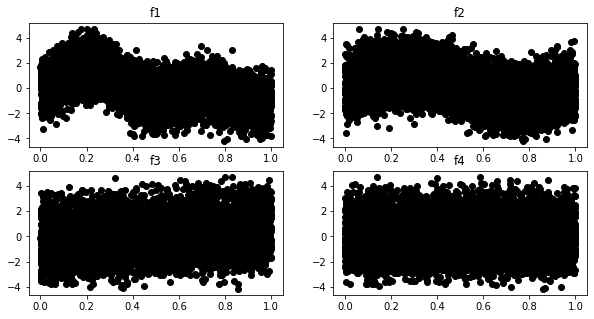

In [75]:
plt.figure(figsize=(10,5))


plt.subplot(221)
plt.title('f1')
plt.plot(x1,y,'ko')

plt.subplot(222)
plt.title('f2')
plt.plot(x2,y,'ko')

plt.subplot(223)
plt.title('f3')
plt.plot(x3,y,'ko')

plt.subplot(224)
plt.title('f4')
plt.plot(x4,y,'ko')

#plt.ylim(lim)
plt.show()


In [76]:
Z = np.array([z1,z2,z3,z4]).T

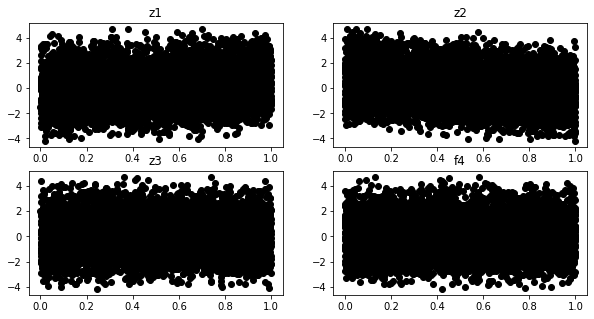

In [77]:
plt.figure(figsize=(10,5))


plt.subplot(221)
plt.title('z1')
plt.plot(z1,y,'ko')

plt.subplot(222)
plt.title('z2')
plt.plot(z2,y,'ko')

plt.subplot(223)
plt.title('z3')
plt.plot(z3,y,'ko')

plt.subplot(224)
plt.title('f4')
plt.plot(z4,y,'ko')

#plt.ylim(lim)
plt.show()


Calculate the standard deviation of observed data and define the knot and make design matrix

In [78]:
#sd = np.std(x)
#knot = defineKnot(x)
#d_x = b(x,knot,sd).T

In [79]:
sd1 = np.std(x1)
knot1 = defineKnot(x1)
d_x1 = b(x1,knot1,sd1).T

sd2 = np.std(x2)
knot2 = defineKnot(x2)
d_x2 = b(x2,knot2,sd2).T

sd3 = np.std(x3)
knot3 = defineKnot(x3)
d_x3 = b(x3,knot3,sd3).T

sd4 = np.std(x4)
knot4 = defineKnot(x4)
d_x4 = b(x4,knot4,sd4).T

# LSE method
plotting the fitted value

In [80]:
def linplot(x,d_x):
    fitted = (product(d_x)/(d_x.dot(d_x))).dot(y)
    plot_m = np.array(sorted(np.array([x,fitted]).T,key=lambda x: x[0]))
    plt.plot(plot_m[:,0],plot_m[:,1],'k',grid_x, grid_y-grid_y.mean(), '--')

In [81]:
def lplot(x,d_x):
    #try:
    fitted = d_x.dot(np.linalg.inv(d_x.T.dot(d_x))).dot(d_x.T).dot(y)
    #except:
    #    fitted = d_x.dot(product(d_x)).dot(d_x.T).dot(y)
    plot_m = np.array(sorted(np.array([x,fitted]).T,key=lambda x: x[0]))
    plt.plot(plot_m[:,0],plot_m[:,1],'k',grid_x, grid_y-grid_y.mean(), '--')
    
def lplotb(x,d_x,m):
    fitted  = d_x.dot(m)
    plot_m = np.array(sorted(np.array([x,fitted]).T,key=lambda x: x[0]))
    plt.plot(plot_m[:,0],plot_m[:,1],'k',grid_x, grid_y-grid_y.mean(), '--')

In [82]:
z1.T.dot(y)/(z1.dot(z1))

0.17096945199337368

In [83]:
z2.T.dot(y)/(z2.dot(z2))

-0.2591423178653314

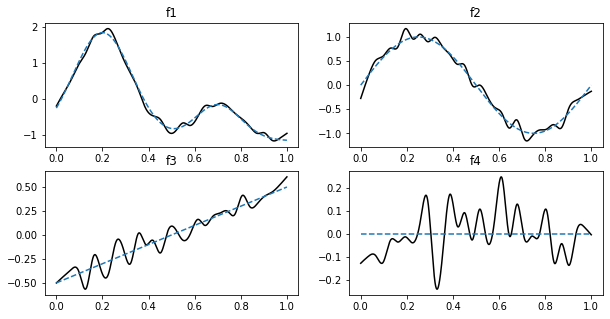

In [84]:
plt.figure(figsize=(10,5))
grid_x = np.linspace(0,1,1000)

grid_y = f1(grid_x)
plt.subplot(221)
plt.title('f1')
lplot(x1,d_x1)

grid_y = f2(grid_x)
plt.subplot(222)
plt.title('f2')
lplot(x2,d_x2)

grid_y = f3(grid_x)
plt.subplot(223)
plt.title('f3')
lplot(x3,d_x3)

grid_y = f4(grid_x)
plt.subplot(224)
plt.title('f4')
lplot(x4,d_x4)


plt.show()

Blue dashed line is true function and solid line is LSE estimated function

# MFVB method
setting prior as
$$
\begin{align*}
 p(Y|\tau,\beta)  &\sim N(X\beta , \tau^{-1} \cdot I_N)\\
 p(\beta_i | \gamma_i) &\sim^{ind} N(0,\gamma^{-1}) \text{ for } i=1,\dots p \\
 p(\gamma) &\sim Gamma(a,b) \\
 p(\tau) &\sim Gamma(c,d)   
\end{align*}
$$

By Baye's rule
$$
p(\tau,\gamma ,\beta | Y) \propto p(Y|\tau,\beta) p(\beta | \gamma) p(\tau) p(\gamma) 
$$
Then variational distribution is
$$
p(\tau,\gamma ,\mu | Y) \approx q(\tau,\gamma,\mu) = q_1(\tau) q_2(\gamma) q_3(\mu)
$$
we can maximize ELBO by coordinate descent algorithm
$$
\begin{align*}
q_1^*(\tau) &= E_{q_2,q_3}[p(\tau,\gamma ,\beta | Y)] \propto E_{q_2,q_3}[p(Y|\tau,\beta)  p(\tau)]\\
q_2^*(\gamma) &= E_{q_1,q_3}[p(\tau,\gamma ,\beta | Y)] \propto E_{q_1,q_3}[ p(\beta | \gamma)   p(\gamma)]\\
q_3^*(\beta) &= E_{q_1,q_2}[p(\tau,\gamma ,\beta | Y)] \propto E_{q_1,q_2}[p(Y|\tau,\beta) p(\beta | \gamma)   ]\\
\end{align*}
$$
Then
$$
\begin{align*}
q_1^* &\sim Gamma\left(c + \frac{N+1}{2}, d + \frac{1}{2}\left\{Y'Y -E_{q3}[\beta'](X'Y)\right\} + tr\left[X(var_{q3}[\beta]+E_{q3}[\beta]E_{q3}[\beta'])X'\right]\right)\\
q_2^* &\sim \prod_{i=1}^{p}Gamma( a+ \frac{1}{2}, b + \frac{1}{2}\{var_{q3}[\beta]_{i,i} +E_{q3}[\beta_i]^2 \})\\
q_3^* &\sim N\left(E_{q1}[\tau]\Sigma X'Y,\left(diag(E_{q2}[\gamma]) + E_{q1}[\tau]X'X \right)^{-1} = \Sigma \right)
\end{align*}
$$

In [85]:
def mfvb(X,y,max_iter=100):
    
    N,p = X.shape
    a ,b, c, d = [10**(-7)]*4
    a_tilde = np.repeat(a + 0.5, p)
    b_tilde = np.repeat(b,p)
    c_tilde = c + (N+1)/2
    d_tilde = d
    
    mu_coeffs = np.repeat(0,p)
    sigma_coeffs = np.diag(np.repeat(1,p))
    
    for i in range(max_iter):
        expected_coeffs = mu_coeffs
        double_expected_coeffs = sigma_coeffs + product(mu_coeffs)
        diagonal_sigma = np.diag(sigma_coeffs)
        expected_alpha = np.array(list(map(lambda x : a_tilde[x]/b_tilde[x] , np.arange(0,p))))
        log_expected_alpha = np.array(list(map(lambda x : digamma(a_tilde[x])-np.log(b_tilde[x]) , np.arange(0,p))))
        expected_tau = c_tilde / d_tilde
        log_expected_tau = digamma(c_tilde)-np.log(d_tilde)
        sigma_coeffs = np.linalg.inv(np.diag(expected_alpha)+expected_tau*(X.T.dot(X)))
        mu_coeffs =  expected_tau*sigma_coeffs.dot(X.T.dot(y))
        b_tilde = np.array(list(map(lambda x : (diagonal_sigma[x]+mu_coeffs[x]**2)/2 + b , np.arange(0,p))))
        d_tilde = d+0.5*(y.T.dot(y)) - expected_coeffs.T.dot((X.T.dot(y)))+ 0.5*sum(np.diag(X.dot(double_expected_coeffs).dot(X.T)))
    return mu_coeffs,sigma_coeffs

In [86]:
m1,c1 = mfvb(d_x1,y)
m2,c2 = mfvb(d_x2,y)
m3,c3 = mfvb(d_x3,y)
m4,c4 = mfvb(d_x4,y)

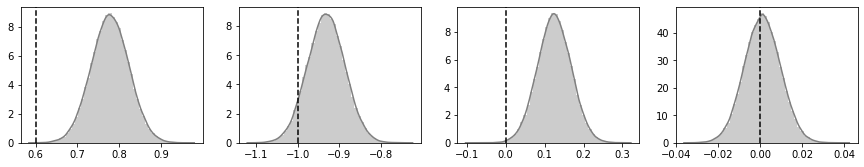

In [87]:
lm,lc = mfvb(Z,y)
plt.figure(figsize=(15,2.5))

plt.subplot(141)
sns.distplot(np.random.normal(lm[0],np.sqrt(lc[0,0]),100000),color = 'gray')
plt.axvline(0.6, color = 'k',linestyle='--')

plt.subplot(142)
sns.distplot(np.random.normal(lm[1],np.sqrt(lc[1,1]),100000),color = 'gray')
plt.axvline(-1, color = 'k',linestyle='--')

plt.subplot(143)
sns.distplot(np.random.normal(lm[2],np.sqrt(lc[2,2]),100000),color = 'gray')
plt.axvline(0, color = 'k',linestyle='--')

plt.subplot(144)
sns.distplot(np.random.normal(lm[3],np.sqrt(lc[3,3]),100000),color = 'gray')
plt.axvline(0, color = 'k',linestyle='--')
plt.show()

In [90]:
def ci95(m,c,n=1000):
    np.random.seed(4428)
    sampled_coef = np.random.multivariate_normal(m,c,size=n)
    y_grid = np.array([d_x.dot(b) for b in sampled_coef])
    quantile = np.array([np.sort(x)[[int(n*0.025),int(n*0.5),int(n*0.975)]] for x in y_grid.T])
    xq = np.array(sorted(np.array([x,quantile[:,0],quantile[:,1],quantile[:,2]]).T,key= lambda x : x[0]))
    plt.fill_between(xq[:,0], xq[:,1],xq[:,3], color =(0,0,0,0.2))
    y = f(grid_x)- f(grid_x).mean()
    plt.plot(xq[:,0],xq[:,2],'k',grid_x, y, '--')
    #plt.plot(x_grid,y_grid[10],'k',x_grid, f(x_grid), '--')
    #plt.ylim(-1.5,3.5)
    plt.show()
    

def ci95s(m,c,y,x,d_x,n=10000):
    np.random.seed(4428)
    sampled_coef = np.random.multivariate_normal(m,c,size=n)
    y_grid = np.array([d_x.dot(b) for b in sampled_coef])
    quantile = np.array([np.sort(x)[[int(n*0.025),int(n*0.5),int(n*0.975)]] for x in y_grid.T])
    xq = np.array(sorted(np.array([x,quantile[:,0],quantile[:,1],quantile[:,2]]).T,key= lambda x : x[0]))
    plt.fill_between(xq[:,0], xq[:,1],xq[:,3], color =(0,0,0,0.2))
    plt.plot(xq[:,0],xq[:,2],'k',grid_x, y, '--')
    #plt.plot(x_grid,y_grid[10],'k',x_grid, f(x_grid), '--')
    #plt.ylim(-1.5,3.5)
    #plt.show()

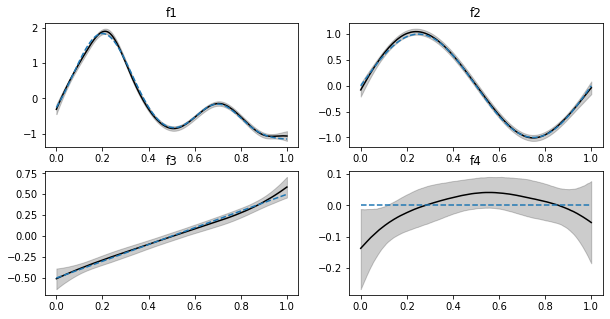

In [91]:
grid_x = np.linspace(0,1,1000)
y1 = f1(grid_x)- f1(grid_x).mean()
y2 = f2(grid_x)- f2(grid_x).mean()
y3 = f3(grid_x)- f3(grid_x).mean()
y4 = f4(grid_x)- f4(grid_x).mean()

plt.figure(figsize=(10,5))


plt.subplot(221)
plt.title('f1')
ci95s(m1,c1,y1,x1,d_x1)

plt.subplot(222)
plt.title('f2')
ci95s(m2,c2,y2,x2,d_x2)

plt.subplot(223)
plt.title('f3')
ci95s(m3,c3,y3,x3,d_x3)

plt.subplot(224)
plt.title('f4')
ci95s(m4,c4,y4,x4,d_x4)


plt.show()

In [28]:
#ci95(m,c,n=1000)

In [29]:
lms4,lcs4,lws4 = vselect2(Z,y)
plt.figure(figsize=(15,2.5))

plt.subplot(121)
sns.distplot(np.random.normal(lms4[0],np.sqrt(lcs4[0,0]),100000),color = 'gray')
plt.axvline(0.6, color = 'k',linestyle='--')

plt.subplot(122)
sns.distplot(np.random.normal(lms4[1],np.sqrt(lcs4[1,1]),100000),color = 'gray')
plt.axvline(-1, color = 'k',linestyle='--')
plt.show()

NameError: name 'vselect2' is not defined

Dashed line is True function, solid line is median estimator and gray filled area is 95% confidence interval

# MFVB method with variable selection
Variable selection model is
$$
\begin{align*}
Y = X\Gamma\beta + \epsilon , \;\;\; \epsilon \sim N(0,\sigma^2 I)
\end{align*}
$$
where 
$$
\begin{align*}
Y|\beta,\sigma^2 ,\gamma &\sim N(X\Gamma\beta , \sigma^2 I)\\
\sigma^2 &\sim Inverse-Gamma(A,B)\\
\beta_j &\sim N(0, \sigma_{\beta}^2)\\
\gamma_j &\sim Bernoulli(\rho)
\end{align*}
$$

In [ ]:
'''
n = 100
x1 = np.random.uniform(size = n)
x2 = np.random.uniform(size = n)
x3 = np.random.uniform(size = n)
x4 = np.random.uniform(size = n)
x5 = np.random.uniform(size = n)
x6 = np.random.uniform(size = n)

X = np.array([x1,x2,x3,x4,x5,x6]).T
Beta_true = np.array([0.02,0.03,0.4,1,0,0])
y2 = X.dot(Beta_true) + np.random.normal(size=n)
y2 = y2- y2.mean()
N,p = X.shape
'''

In [30]:
def expit(x):
    if x < 100:
        return(np.exp(x)/(1+np.exp(x)))
    else:
        return(1)

In [93]:
def vselect1(X,y,maxiter=100,rho = 0.5):
    N,p = X.shape
    sigmab = 1
    A = 10**(-7)
    B = 10**(-7)
    tau = 1
    w = np.repeat(0.5,p)
    lamb= np.log(rho/(1-rho))
    t = 0
    for iteration in range(maxiter):
        test= False
        W = np.diag(w)
        omega = product(w) + W.dot(np.eye(p)-W)
        sigma = np.linalg.inv(tau*np.multiply(X.T.dot(X),omega)+ (1/sigmab) * np.eye(p))
        mu = tau*sigma.dot(W.dot(X.T.dot(y)))

        s = B + 0.5*(np.linalg.norm(y)**2 -2*y.T.dot(X).dot(W).dot(mu) + np.trace(np.multiply(X.T.dot(X),omega).dot(product(mu) +sigma)))
        tau = (A+N/2)/s

        wstar = w.copy()
        eta = np.zeros(p)
        for j in range(p):
            eta[j] = lamb - 0.5*tau *(mu[j]**2 + sigma[j,j])*np.linalg.norm(X[:,j])**2 + tau *X[:,j].T.dot(y*mu[j]-np.delete(X, j, axis=1).dot(np.diag(np.delete(wstar,j))).dot(np.delete(mu,j,0)*mu[j] + np.delete(sigma,j,axis=1)[j,:]))
            wstar[j] = expit(eta[j]) 
        w = wstar
        #print(np.array(eta).round(2))
        #print(np.array(wstar).round(2))
    rmse = (y - X.dot(np.diag(w)).dot(mu)).dot(y - X.dot(np.diag(w)).dot(mu))
    #print(rmse)
    return(mu,sigma,w)#,rmse)

In [94]:
ms1,cs1,ws1 = vselect1(d_x1,y)
ms2,cs2,ws2 = vselect1(d_x2,y)
ms3,cs3,ws3 = vselect1(d_x3,y)
ms4,cs4,ws4 = vselect1(d_x4,y)

In [104]:
def cil95(m,c,w,n=100):
    np.random.seed(4428)
    #smaple_gam = np.random.r
    sampled_coef = np.random.multivariate_normal(m,c,size=n)
    lst = []
    for j in w2:
        lst.append(np.random.binomial(1,j))
    w2ar = np.array(lst)
    
    y_grid = np.array([d_x.dot(np.diag(w2ar)).dot(b) for b in sampled_coef])
    quantile = np.array([np.sort(x)[[int(n*0.05),int(n*0.5),int(n*0.95)]] for x in y_grid.T])
    xq = np.array(sorted(np.array([x,quantile[:,0],quantile[:,1],quantile[:,2]]).T,key= lambda x : x[0]))
    plt.fill_between(xq[:,0], xq[:,1],xq[:,3], color =(0,0,0,0.2))
    y = f(grid_x)- f(grid_x).mean()
    plt.plot(xq[:,0],xq[:,2],'k',grid_x, y, '--')
    #plt.plot(x_grid,y_grid[10],'k',x_grid, f(x_grid), '--')
    plt.ylim(-2,2)#1.5,3.5)
    plt.show()
    
def cil95s(m,c,w,x,d_x,y,n=100):
    np.random.seed(4428)
    #smaple_gam = np.random.r
    sampled_coef = np.random.multivariate_normal(m,c,size=n)
    lst = []
    for j in w:
        lst.append(np.random.binomial(1,j))
    w2ar = np.array(lst)
    
    y_grid = np.array([d_x.dot(np.diag(w2ar)).dot(b) for b in sampled_coef])
    quantile = np.array([np.sort(x)[[int(n*0.05),int(n*0.5),int(n*0.95)]] for x in y_grid.T])
    plt.ylim(-1.7,1.7)
    xq = np.array(sorted(np.array([x,quantile[:,0],quantile[:,1],quantile[:,2]]).T,key= lambda x : x[0]))
    plt.fill_between(xq[:,0], xq[:,1],xq[:,3], color =(0,0,0,0.2))
    #y = f(grid_x)- f(grid_x).mean()
    #plt.ylim(-1.5,1.5)
    plt.hlines(y=0,linestyles='dashed',colors='gray',xmin=0,xmax=1)
    plt.plot(xq[:,0],xq[:,2],'k',grid_x, y, '--')
    #plt.plot(x_grid,y_grid[10],'k',x_grid, f(x_grid), '--')
    plt.ylim(-2,2)
    #plt.show()

Spike and slab variable selection plot

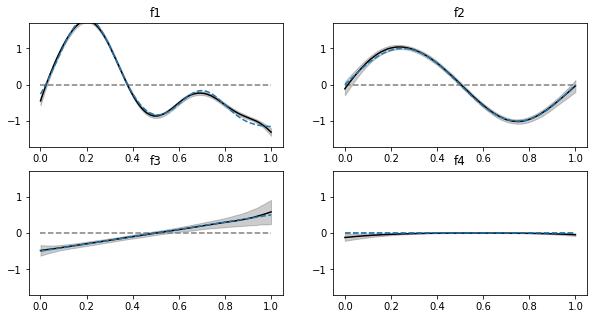

In [96]:
grid_x = np.linspace(0,1,1000)
y1 = f1(grid_x)- f1(grid_x).mean()
y2 = f2(grid_x)- f2(grid_x).mean()
y3 = f3(grid_x)- f3(grid_x).mean()
y4 = f4(grid_x)- f4(grid_x).mean()

plt.figure(figsize=(10,5))


plt.subplot(221)
#plt.ylim(-1.4)
plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(222)
plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(223)
plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(224)
plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)


plt.show()

ValueError: cov must be 2 dimensional and square

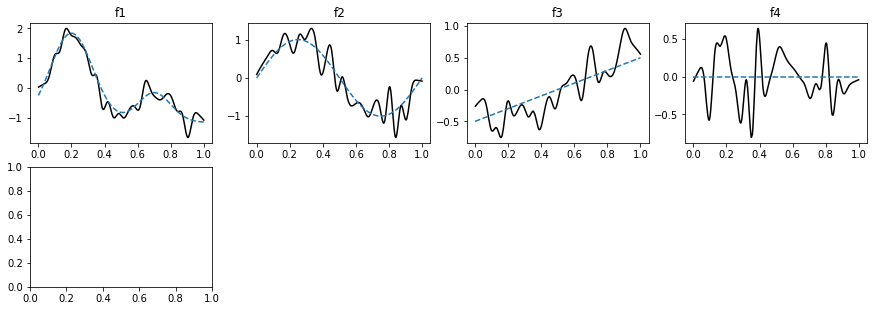

In [93]:
y1 = f1(grid_x)- f1(grid_x).mean()
y2 = f2(grid_x)- f2(grid_x).mean()
y3 = f3(grid_x)- f3(grid_x).mean()
y4 = f4(grid_x)- f4(grid_x).mean()

plt.figure(figsize=(15,7.5))
grid_x = np.linspace(0,1,1000)


grid_y = f1(grid_x)
plt.subplot(341)
plt.title('f1')
lplot(x1,d_x1)

grid_y = f2(grid_x)
plt.subplot(342)
plt.title('f2')
lplot(x2,d_x2)

grid_y = f3(grid_x)
plt.subplot(343)
plt.title('f3')
lplot(x3,d_x3)

grid_y = f4(grid_x)
plt.subplot(344)
plt.title('f4')
lplot(x4,d_x4)

plt.subplot(345)
#plt.title('f1')
ci95s(m1,c1,y1,x1,d_x1)

plt.subplot(346)
#plt.title('f2')
ci95s(m2,c2,y2,x2,d_x2)

plt.subplot(347)
#plt.title('f3')
ci95s(m3,c3,y3,x3,d_x3)

plt.subplot(348)
#plt.title('f4')
ci95s(m4,c4,y4,x4,d_x4)

plt.subplot(349)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(3,4,10)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(3,4,11)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(3,4,12)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)



plt.show()

C:\Users\SUIC_STAR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SUIC_STAR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


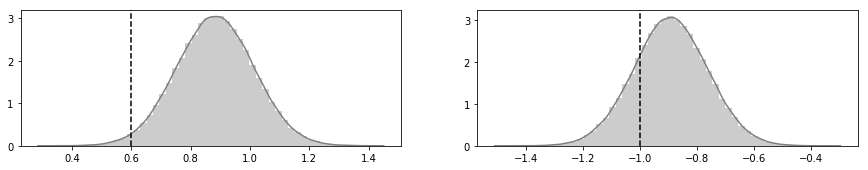

In [235]:
lms4,lcs4,lws4 = vselect1(Z,y)
plt.figure(figsize=(15,2.5))

plt.subplot(121)
sns.distplot(np.random.normal(lms4[0],np.sqrt(lcs4[0,0]),100000),color = 'gray')
plt.axvline(0.6, color = 'k',linestyle='--')

plt.subplot(122)
sns.distplot(np.random.normal(lms4[1],np.sqrt(lcs4[1,1]),100000),color = 'gray')
plt.axvline(-1, color = 'k',linestyle='--')
plt.show()

$$y = \sum_{l=1}^{4} f_l(X_l) + e $$

$$
\begin{align*}
f_1(x) &= 3exp(-30(x-0.3)^2)+exp(-50(x-0.7)^2)\\
f_2(x) &= sin(2\pi x)\\
f_3(x) &= x\\
f_4(x) &= 0
\end{align*}
$$

파란색 점선은 각 함수의 참값을 나타내고 검은색 실선은 median estimator 회색 음영부분은 95%신뢰구간을 표현합니다  
위에서 부터 각각 LSE, Variational inference, Variational Inference with spike and slab prior 입니다  
변수 선택을 한 마지막 모형에서 함수가 0인 부분 을 잘 표현하는 것을 확인 할 수 있었습니다  

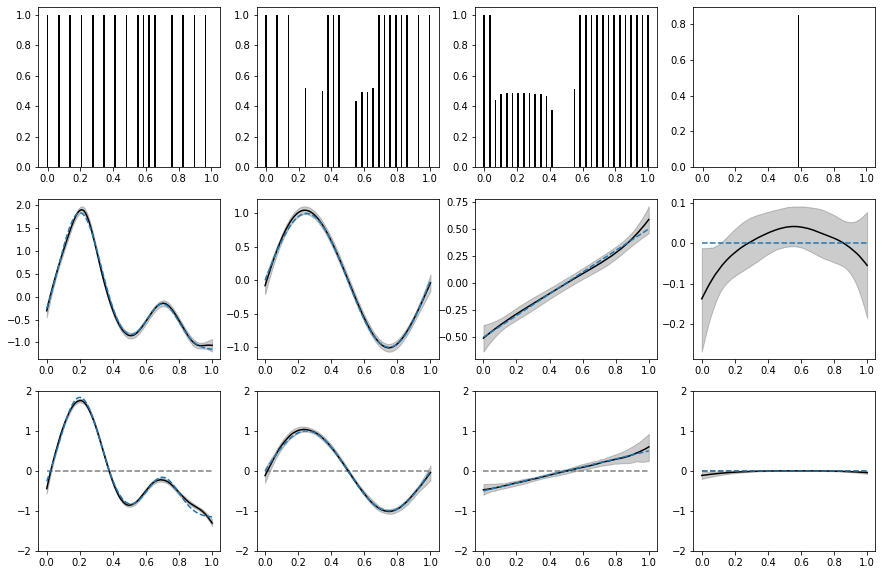

In [105]:
ms1,cs1,ws1 = vselect1(d_x1,y)
ms2,cs2,ws2 = vselect1(d_x2,y)
ms3,cs3,ws3 = vselect1(d_x3,y)
ms4,cs4,ws4 = vselect1(d_x4,y)
plt.figure(figsize=(15,10))

plt.subplot(341)
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(342)
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(343)
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(344)
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')

plt.subplot(345)
#plt.title('f1')
ci95s(m1,c1,y1,x1,d_x1)

plt.subplot(346)
#plt.title('f2')
ci95s(m2,c2,y2,x2,d_x2)

plt.subplot(347)
#plt.title('f3')
ci95s(m3,c3,y3,x3,d_x3)

plt.subplot(348)
#plt.title('f4')
ci95s(m4,c4,y4,x4,d_x4)

plt.subplot(349)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(3,4,10)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(3,4,11)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(3,4,12)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)

plt.show()

In [95]:
ms1,cs1,ws1 = vselect2(d_x1,y)
ms2,cs2,ws2 = vselect2(d_x2,y)
ms3,cs3,ws3 = vselect2(d_x3,y)
ms4,cs4,ws4 = vselect2(d_x4,y)

31.0 1.0
31.0 1.0
31.0 1.0
1.0 31.0


ValueError: cov must be 2 dimensional and square

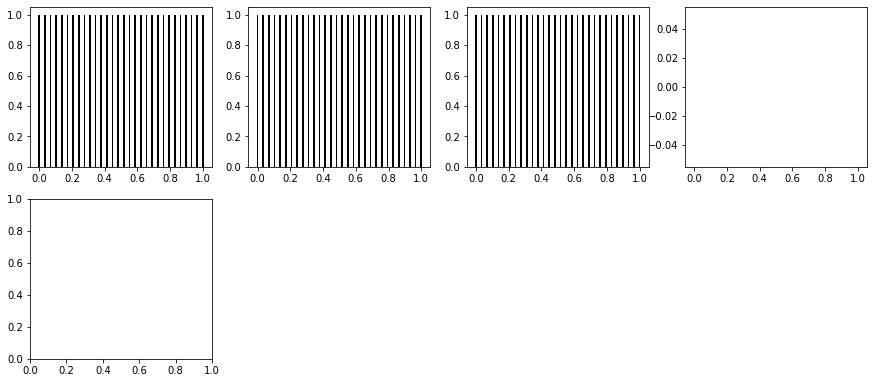

In [96]:
plt.figure(figsize=(15,10))

plt.subplot(341)
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(342)
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(343)
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(344)
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')

plt.subplot(345)
#plt.title('f1')
ci95s(m1,c1,y1,x1,d_x1)

plt.subplot(346)
#plt.title('f2')
ci95s(m2,c2,y2,x2,d_x2)

plt.subplot(347)
#plt.title('f3')
ci95s(m3,c3,y3,x3,d_x3)

plt.subplot(348)
#plt.title('f4')
ci95s(m4,c4,y4,x4,d_x4)

plt.subplot(349)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(3,4,10)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(3,4,11)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(3,4,12)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)

plt.show()

C:\Users\SUIC_STAR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SUIC_STAR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SUIC_STAR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\SUIC_STAR\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SUIC_STAR\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34:

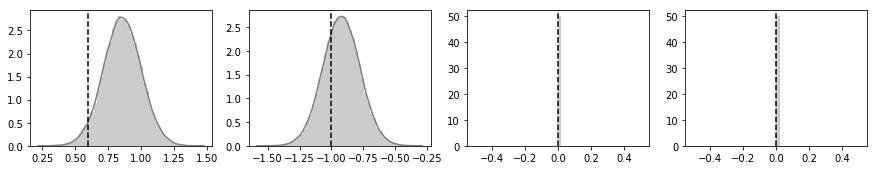

In [55]:
lms4,lcs4,lws4 = vselect2(Z,y)
plt.figure(figsize=(15,2.5))

plt.subplot(141)
sns.distplot(np.random.normal(lms4[0],np.sqrt(lcs4[0,0]),100000),color = 'gray')
plt.axvline(0.6, color = 'k',linestyle='--')

plt.subplot(142)
sns.distplot(np.random.normal(lms4[1],np.sqrt(lcs4[1,1]),100000),color = 'gray')
plt.axvline(-1, color = 'k',linestyle='--')

plt.subplot(143)
sns.distplot(np.repeat(0,100000),color = 'gray')
plt.axvline(0, color = 'k',linestyle='--')

plt.subplot(144)
sns.distplot(np.repeat(0,100000),color = 'gray')
plt.axvline(-0, color = 'k',linestyle='--')

plt.show()

In [ ]:
ms1,cs1,ws1 = vselect2(d_x1,y)
ms2,cs2,ws2 = vselect2(d_x2,y)
ms3,cs3,ws3 = vselect2(d_x3,y)
ms4,cs4,ws4 = vselect2(d_x4,y)

18.0 14.0
26.0 6.0
31.0 1.0
1.0 31.0


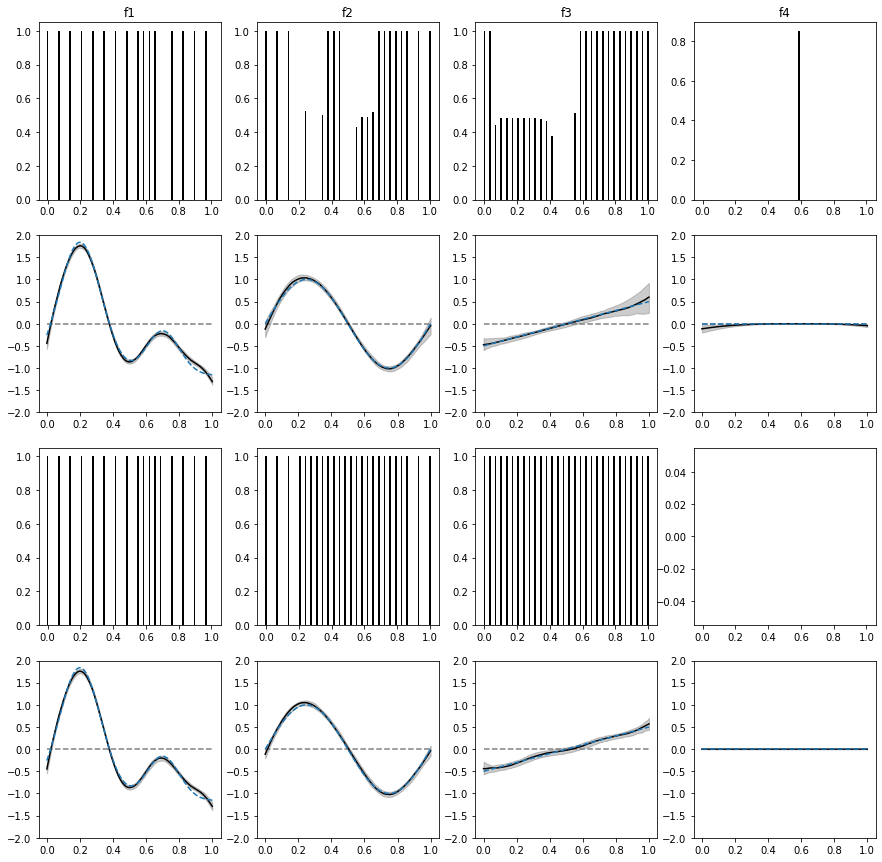

In [109]:
ms1,cs1,ws1 = vselect1(d_x1,y)
ms2,cs2,ws2 = vselect1(d_x2,y)
ms3,cs3,ws3 = vselect1(d_x3,y)
ms4,cs4,ws4 = vselect1(d_x4,y)
plt.figure(figsize=(15,15))

plt.subplot(441)
plt.title('f1')
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(442)
plt.title('f2')
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(443)
plt.title('f3')
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(444)
plt.title('f4')
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')

plt.subplot(445)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(4,4,6)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(4,4,7)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(4,4,8)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)


p_alpha,p_beta = 1,1
ms1,cs1,ws1 = vselect2(d_x1,y,p_alpha=p_alpha,p_beta=p_beta)
ms2,cs2,ws2 = vselect2(d_x2,y,p_alpha=p_alpha,p_beta=p_beta)
ms3,cs3,ws3 = vselect2(d_x3,y,p_alpha=p_alpha,p_beta=p_beta)
ms4,cs4,ws4 = vselect2(d_x4,y,p_alpha=p_alpha,p_beta=p_beta)

plt.subplot(4,4,9)
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(4,4,10)
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(4,4,11)
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(4,4,12)
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')


plt.subplot(4,4,13)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(4,4,14)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(4,4,15)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(4,4,16)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)


plt.show()

19.0 15.0
27.0 7.0
32.0 2.0
2.0 32.0


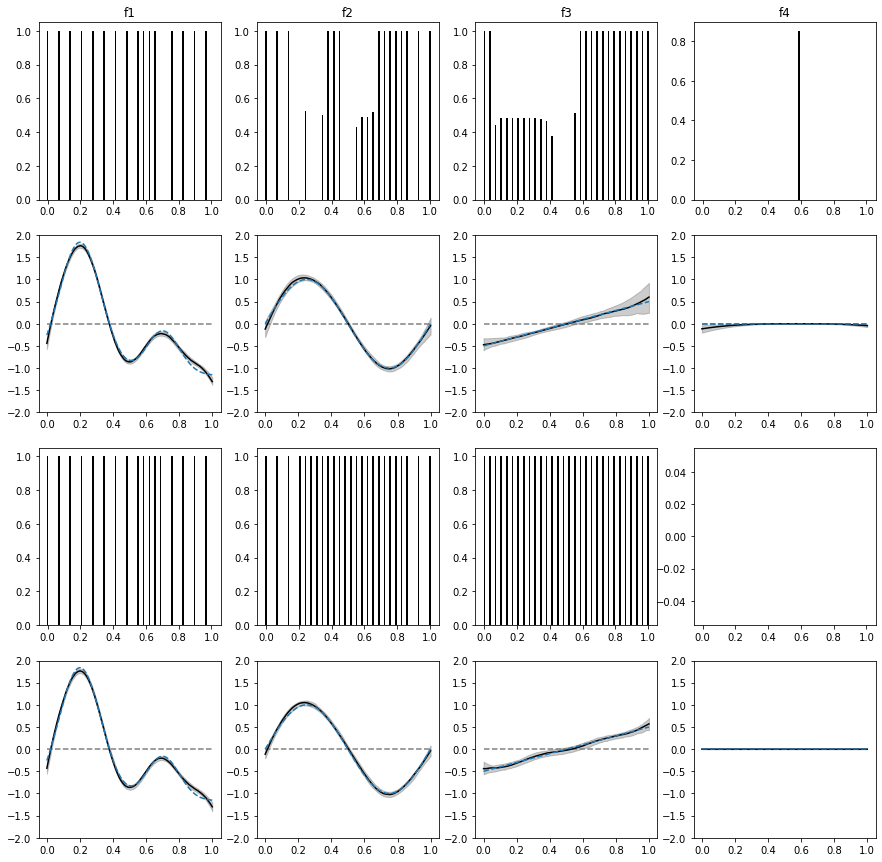

In [110]:
ms1,cs1,ws1 = vselect1(d_x1,y)
ms2,cs2,ws2 = vselect1(d_x2,y)
ms3,cs3,ws3 = vselect1(d_x3,y)
ms4,cs4,ws4 = vselect1(d_x4,y)
plt.figure(figsize=(15,15))

plt.subplot(441)
plt.title('f1')
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(442)
plt.title('f2')
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(443)
plt.title('f3')
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(444)
plt.title('f4')
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')

plt.subplot(445)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(4,4,6)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(4,4,7)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(4,4,8)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)


p_alpha,p_beta = 2,2
ms1,cs1,ws1 = vselect2(d_x1,y,p_alpha=p_alpha,p_beta=p_beta)
ms2,cs2,ws2 = vselect2(d_x2,y,p_alpha=p_alpha,p_beta=p_beta)
ms3,cs3,ws3 = vselect2(d_x3,y,p_alpha=p_alpha,p_beta=p_beta)
ms4,cs4,ws4 = vselect2(d_x4,y,p_alpha=p_alpha,p_beta=p_beta)

plt.subplot(4,4,9)
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(4,4,10)
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(4,4,11)
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(4,4,12)
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')


plt.subplot(4,4,13)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(4,4,14)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(4,4,15)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(4,4,16)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)


plt.show()

15.0 18.0
8.0 25.0
5.0 28.0
1.0 32.0


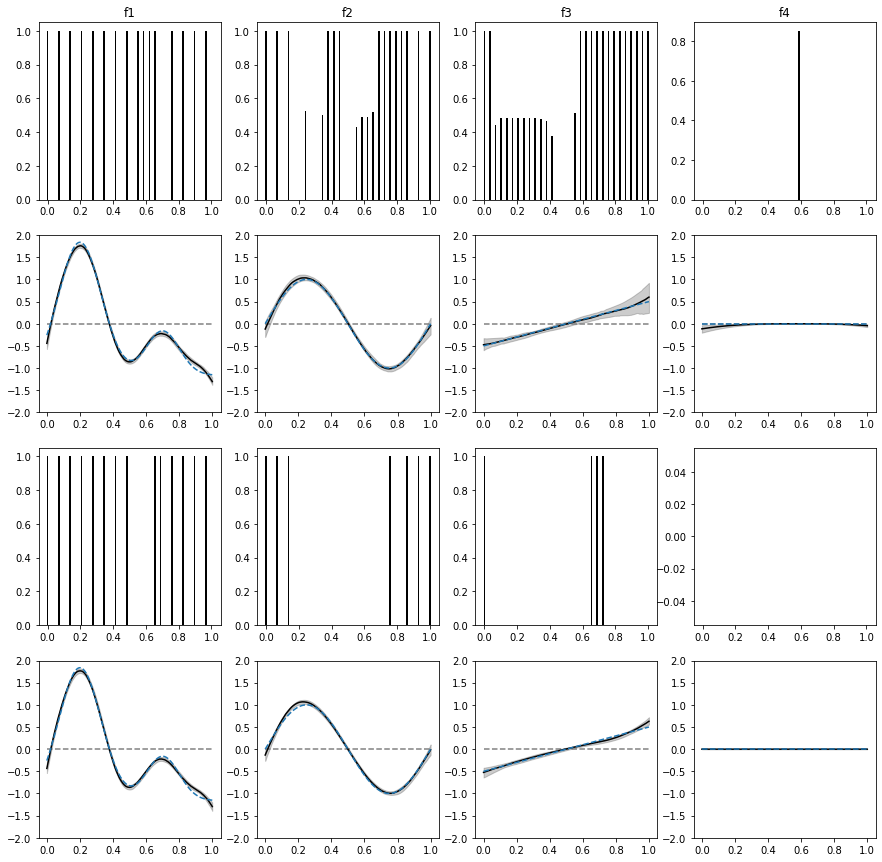

In [111]:
ms1,cs1,ws1 = vselect1(d_x1,y)
ms2,cs2,ws2 = vselect1(d_x2,y)
ms3,cs3,ws3 = vselect1(d_x3,y)
ms4,cs4,ws4 = vselect1(d_x4,y)
plt.figure(figsize=(15,15))

plt.subplot(441)
plt.title('f1')
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(442)
plt.title('f2')
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(443)
plt.title('f3')
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(444)
plt.title('f4')
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')

plt.subplot(445)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(4,4,6)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(4,4,7)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(4,4,8)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)


p_alpha,p_beta = 1,2
ms1,cs1,ws1 = vselect2(d_x1,y,p_alpha=p_alpha,p_beta=p_beta)
ms2,cs2,ws2 = vselect2(d_x2,y,p_alpha=p_alpha,p_beta=p_beta)
ms3,cs3,ws3 = vselect2(d_x3,y,p_alpha=p_alpha,p_beta=p_beta)
ms4,cs4,ws4 = vselect2(d_x4,y,p_alpha=p_alpha,p_beta=p_beta)

plt.subplot(4,4,9)
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(4,4,10)
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(4,4,11)
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(4,4,12)
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')


plt.subplot(4,4,13)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(4,4,14)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(4,4,15)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(4,4,16)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)


plt.show()

20.0 13.0
24.0 9.0
32.0 1.0
32.0 1.0


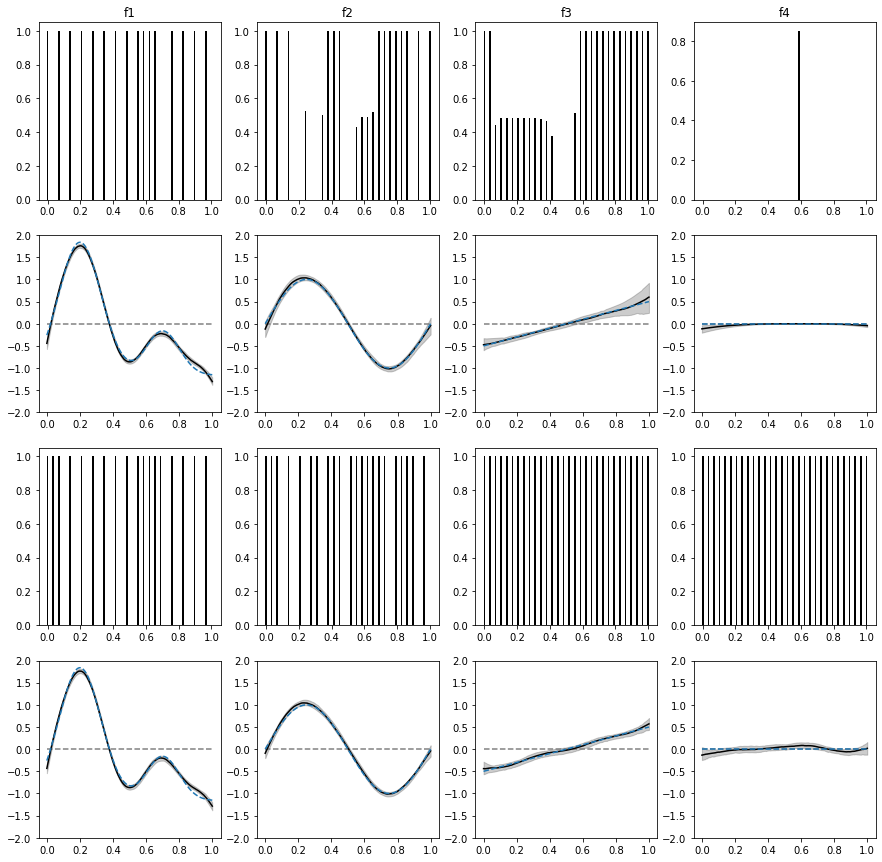

In [112]:
ms1,cs1,ws1 = vselect1(d_x1,y)
ms2,cs2,ws2 = vselect1(d_x2,y)
ms3,cs3,ws3 = vselect1(d_x3,y)
ms4,cs4,ws4 = vselect1(d_x4,y)
plt.figure(figsize=(15,15))

plt.subplot(441)
plt.title('f1')
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(442)
plt.title('f2')
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(443)
plt.title('f3')
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(444)
plt.title('f4')
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')

plt.subplot(445)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(4,4,6)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(4,4,7)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(4,4,8)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)


p_alpha,p_beta = 2,1
ms1,cs1,ws1 = vselect2(d_x1,y,p_alpha=p_alpha,p_beta=p_beta)
ms2,cs2,ws2 = vselect2(d_x2,y,p_alpha=p_alpha,p_beta=p_beta)
ms3,cs3,ws3 = vselect2(d_x3,y,p_alpha=p_alpha,p_beta=p_beta)
ms4,cs4,ws4 = vselect2(d_x4,y,p_alpha=p_alpha,p_beta=p_beta)

plt.subplot(4,4,9)
plt.bar(x =np.linspace(0,1,len(ws1)),height= ws1,width= 0.01,color='k')

plt.subplot(4,4,10)
plt.bar(x =np.linspace(0,1,len(ws2)),height= ws2,width= 0.01,color='k')

plt.subplot(4,4,11)
plt.bar(x =np.linspace(0,1,len(ws3)),height= ws3,width= 0.01,color='k')

plt.subplot(4,4,12)
plt.bar(x =np.linspace(0,1,len(ws4)),height= ws4,width= 0.01,color='k')


plt.subplot(4,4,13)
#plt.title('f1')
cil95s(ms1,cs1,ws1,x1,d_x1,y1)

plt.subplot(4,4,14)
#plt.title('f2')
cil95s(ms2,cs2,ws2,x2,d_x2,y2)

plt.subplot(4,4,15)
#plt.title('f3')
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

plt.subplot(4,4,16)
#plt.title('f4')
cil95s(ms4,cs4,ws4,x4,d_x4,y4)


plt.show()

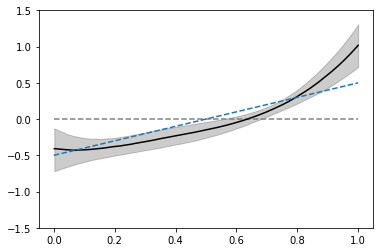

In [44]:
cil95s(ms3,cs3,ws3,x3,d_x3,y3)

In [57]:
p_alpha,p_beta = 1,1.4
ms1,cs1,ws1 = vselect2(d_x1,y,p_alpha=p_alpha,p_beta=p_beta)
ms2,cs2,ws2 = vselect2(d_x2,y,p_alpha=p_alpha,p_beta=p_beta)
ms3,cs3,ws3 = vselect2(d_x3,y,p_alpha=p_alpha,p_beta=p_beta)
ms4,cs4,ws4 = vselect2(d_x4,y,p_alpha=p_alpha,p_beta=p_beta)

30.0 2.4
5.0 27.4
3.9999999344561448 28.400000065543853
1.0 31.4


In [58]:
p_alpha,p_beta = 1,1
ms1,cs1,ws1 = vselect2(d_x1,y,p_alpha=p_alpha,p_beta=p_beta)
ms2,cs2,ws2 = vselect2(d_x2,y,p_alpha=p_alpha,p_beta=p_beta)
ms3,cs3,ws3 = vselect2(d_x3,y,p_alpha=p_alpha,p_beta=p_beta)
ms4,cs4,ws4 = vselect2(d_x4,y,p_alpha=p_alpha,p_beta=p_beta)

31.0 1.0
31.0 1.0
31.0 1.0
1.0 31.0


In [59]:
p_alpha,p_beta = 1,2
ms1,cs1,ws1 = vselect2(d_x1,y,p_alpha=p_alpha,p_beta=p_beta)
ms2,cs2,ws2 = vselect2(d_x2,y,p_alpha=p_alpha,p_beta=p_beta)
ms3,cs3,ws3 = vselect2(d_x3,y,p_alpha=p_alpha,p_beta=p_beta)
ms4,cs4,ws4 = vselect2(d_x4,y,p_alpha=p_alpha,p_beta=p_beta)

3.9999999999999996 29.0
2.999999999999261 30.00000000000074
3.9999999570633777 29.000000042936623
1.0 32.0


In [60]:
p_alpha,p_beta = 2,1
ms1,cs1,ws1 = vselect2(d_x1,y,p_alpha=p_alpha,p_beta=p_beta)
ms2,cs2,ws2 = vselect2(d_x2,y,p_alpha=p_alpha,p_beta=p_beta)
ms3,cs3,ws3 = vselect2(d_x3,y,p_alpha=p_alpha,p_beta=p_beta)
ms4,cs4,ws4 = vselect2(d_x4,y,p_alpha=p_alpha,p_beta=p_beta)

32.0 1.0
32.0 1.0
32.0 1.0
32.0 1.0


In [61]:
p_alpha,p_beta = 2,2
ms1,cs1,ws1 = vselect2(d_x1,y,p_alpha,p_beta)
ms2,cs2,ws2 = vselect2(d_x2,y,p_alpha,p_beta)
ms3,cs3,ws3 = vselect2(d_x3,y,p_alpha,p_beta)
ms4,cs4,ws4 = vselect2(d_x4,y,p_alpha,p_beta)

22.766523591695982 10.233476408304018
26.949092072412217 6.050907927587783
26.910776097055972 6.089223902944028
29.960690275805195 3.039309724194805


In [72]:
c1 = ['prior', 'f1','f2','f3','f4'] 
c2 = ['1, 1.4', '30.0 2.4', '5.0 27.4',' 4.0, 28.4', '1.0 31.4']
c3 = ['1, 1', '31.0 1.0','31.0 1.0','31.0 1.0','1.0 31.0']
c4 = ['1,2', '4.0, 29.0', '3.0, 30.0', '4.0, 30.0', '1.0 32.0']
c5 = ['2, 1', '32.0 1.0' ,'32.0 1.0' ,'32.0 1.0' ,'32.0 1.0']
c6 = ['2, 2', '22.8,10.2','26.9 6.1','26.9 6.1','30.0 3.0']

In [73]:
df = pd.DataFrame([c2,c3,c4,c5,c6]).T

In [74]:
df.index = c1

In [75]:
df

,0,1,2,3,4
prior,"1, 1.4","1, 1","1,2","2, 1","2, 2"
f1,30.0 2.4,31.0 1.0,"4.0, 29.0",32.0 1.0,"22.8,10.2"
f2,5.0 27.4,31.0 1.0,"3.0, 30.0",32.0 1.0,26.9 6.1
f3,"4.0, 28.4",31.0 1.0,"4.0, 30.0",32.0 1.0,26.9 6.1
f4,1.0 31.4,1.0 31.0,1.0 32.0,32.0 1.0,30.0 3.0


In [80]:
for i in c6:
    print('beta(' + i + ')')

beta(2, 2)
beta(22.8,10.2)
beta(26.9 6.1)
beta(26.9 6.1)
beta(30.0 3.0)


In [70]:
expit(-15)

3.059022269256247e-07

In [71]:
expit(5)

0.9933071490757152